In [4]:
#!bash
!git clone https://github.com/udacity/deep-learning-v2-pytorch.git

Cloning into 'deep-learning-v2-pytorch'...
remote: Enumerating objects: 1071, done.
remote: Total 1071 (delta 0), reused 0 (delta 0), pack-reused 1071
Receiving objects: 100% (1071/1071), 129.36 MiB | 44.37 MiB/s, done.
Resolving deltas: 100% (462/462), done.
Checking connectivity... done.


In [7]:
import os
os.chdir('./deep-learning-v2-pytorch/recurrent-neural-networks/')

In [9]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


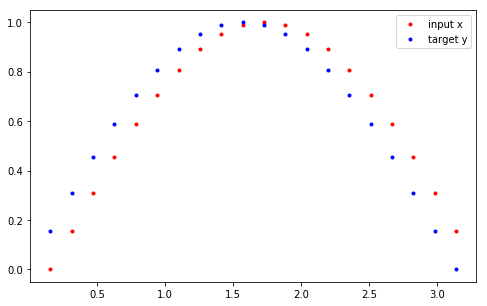

In [11]:
plt.figure(figsize = (8, 5))
seq_length = 20
time_steps = np.linspace(0, np.pi, seq_length+1)
data = np.sin(time_steps)

data.resize((seq_length + 1, 1))
x = data[:-1]
y = data[1:]

plt.plot(time_steps[1:], x, 'r.', label = 'input x')
plt.plot(time_steps[1:], y, 'b.', label = 'target y')
plt.legend(loc = 'best')
plt.show()

In [12]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim = hidden_dim
        
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first = True)
        self.fc = nn.Linear(hidden_dim, output_size)
    
    
    
    def forward(self, x, hidden_state):
        rout, hidden_state = self.rnn(x, hidden_state)
        rout = rout.view(-1, self.hidden_dim)
        output = self.fc(rout)
        return output, hidden_state
    
    

In [15]:
test_rnn = RNN(input_size = 1, output_size = 1, hidden_dim =10, n_layers = 2)
time_steps = np.linspace(0, np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))
test_input = torch.Tensor(data).unsqueeze(0)

In [16]:
print("Input size:", test_input.size())
test_out , hidden_state = test_rnn(test_input, None)
print("Output size: ", test_out.size())
print("Hidden state size: ", hidden_state.size())

Input size: torch.Size([1, 20, 1])
Output size:  torch.Size([20, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [17]:
input_size, output_size, hidden_dim, n_layers = 1, 1, 32, 2

rnn = RNN(input_size, hidden_dim, output_size, n_layers)
rnn

RNN(
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr = 0.001)

In [24]:
def train(rnn, n_steps, print_every):
    hidden_state = None
    for batch_i, step in enumerate(range(n_steps)):
        time_steps = np.linspace(step * np.pi, (step+1)* np.pi, seq_length+ 1)
        data = np.sin(time_steps)
        data.resize((seq_length+1, 1))
        
        x = data[: -1]
        y = data[1 : ]
        
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)
        
        prediction, hidden = rnn(x_tensor, hidden_state)
        
        #hidden_state = hidden_state.data
        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            print("loss: ", loss.item())
            plt.plot(time_steps[1:], x, 'r.')
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')
            plt.show()
            
    return rnn

loss:  0.4982534945011139


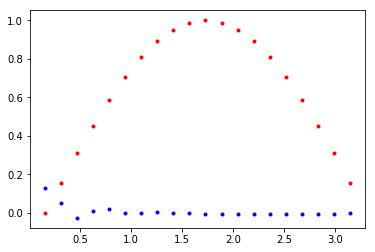

loss:  0.3584907054901123


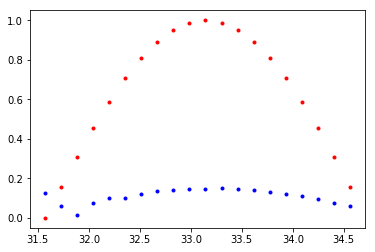

loss:  0.2631363272666931


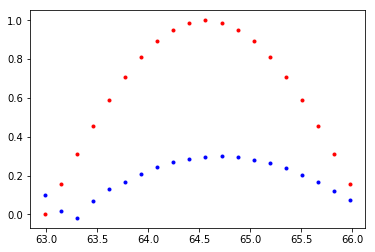

loss:  0.10276583582162857


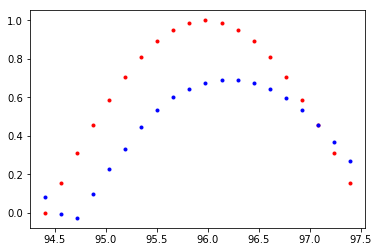

loss:  0.06735316663980484


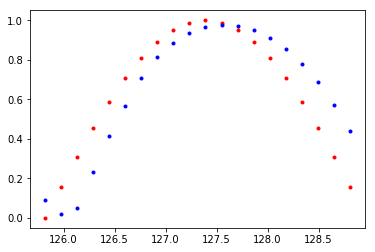

loss:  0.04020010679960251


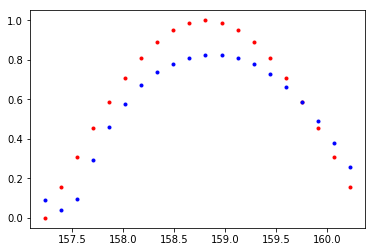

loss:  0.03104349970817566


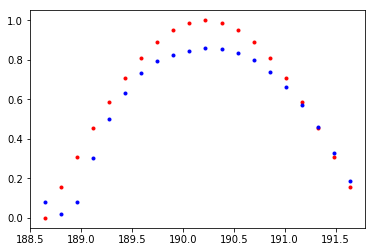

loss:  0.02054923214018345


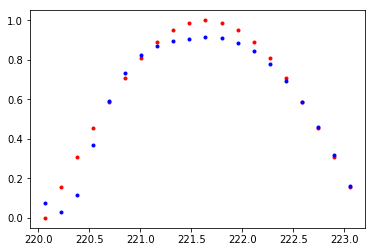

loss:  0.013968254439532757


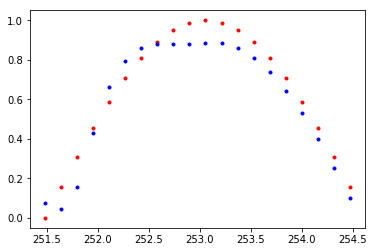

loss:  0.011143215931952


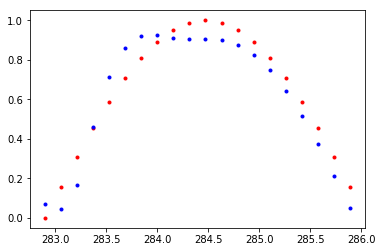

loss:  0.009933293797075748


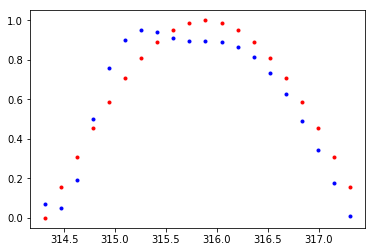

loss:  0.009362059645354748


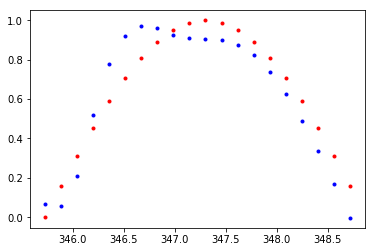

loss:  0.008917205967009068


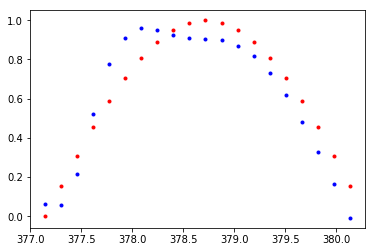

loss:  0.008346161805093288


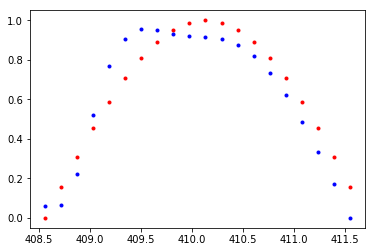

loss:  0.007995464839041233


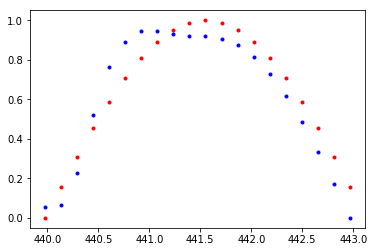

loss:  0.007637299597263336


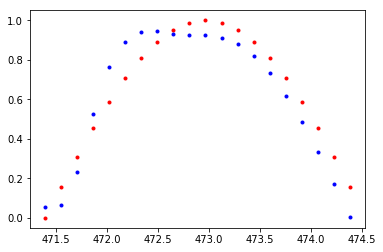

loss:  0.0073429918847978115


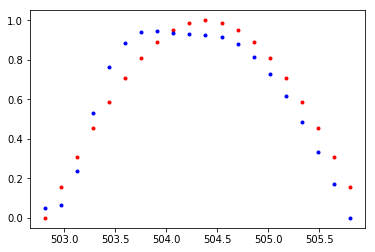

loss:  0.007062812801450491


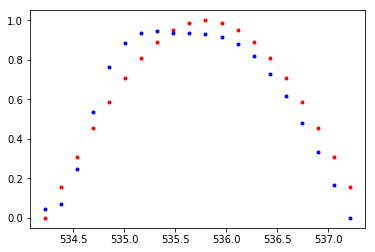

In [25]:
n_steps = 175
print_every= 10

trained_rnn = train(rnn, n_steps, print_every)

loss:  0.006876594386994839


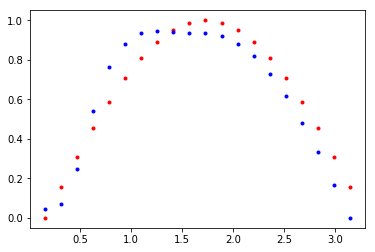

loss:  0.006327665876597166


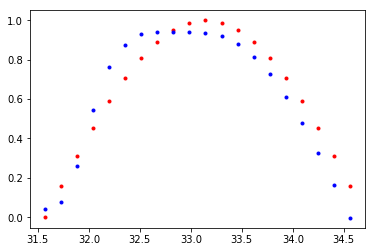

loss:  0.006141234189271927


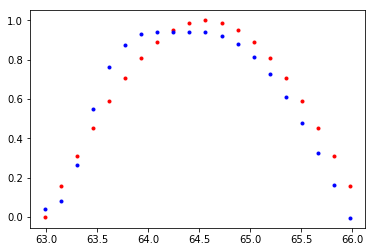

loss:  0.00601233821362257


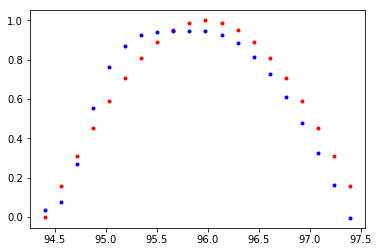

loss:  0.005956121254712343


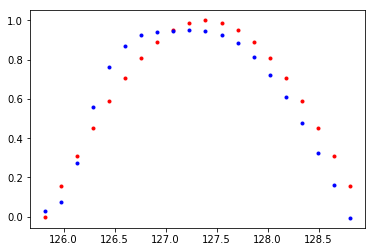

loss:  0.005821452010422945


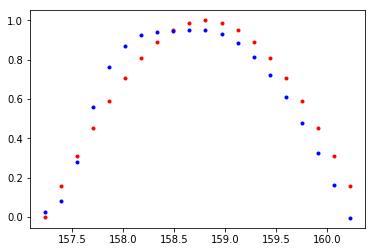

loss:  0.005691627971827984


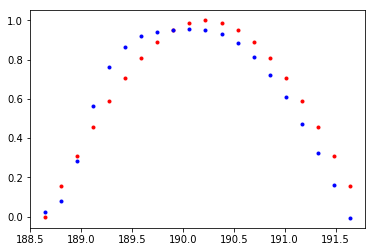

loss:  0.005526268854737282


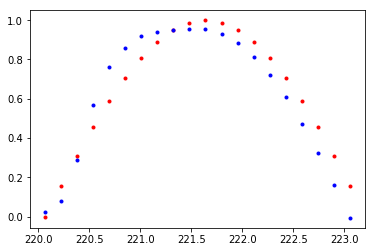

loss:  0.00537314685061574


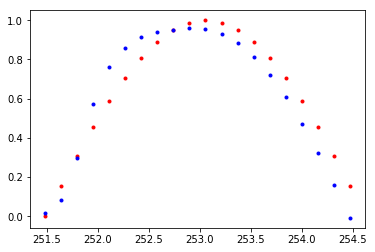

loss:  0.0052192420698702335


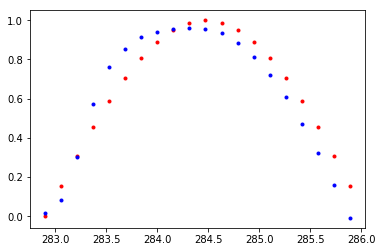

loss:  0.005079666152596474


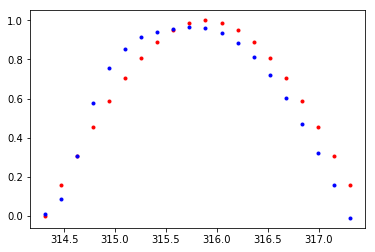

loss:  0.004947155248373747


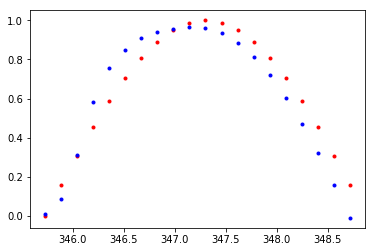

loss:  0.004824424162507057


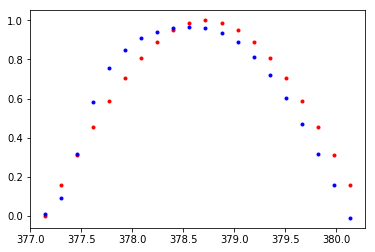

loss:  0.004707925487309694


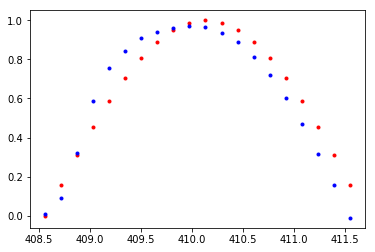

loss:  0.004597790539264679


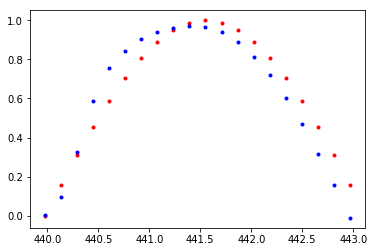

loss:  0.00449278624728322


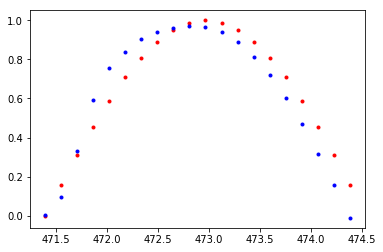

loss:  0.004392747767269611


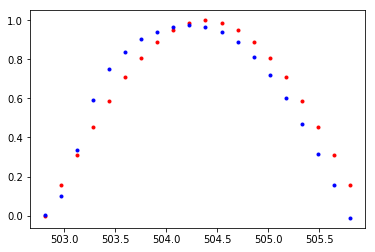

loss:  0.004297280218452215


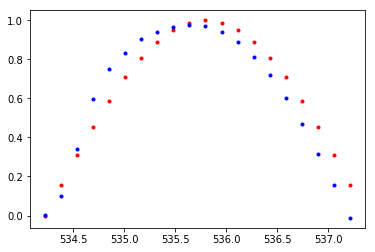

In [26]:

trained_rnn = train(rnn, n_steps, print_every)

loss:  0.004211030900478363


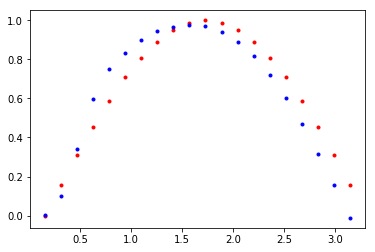

loss:  0.003936204127967358


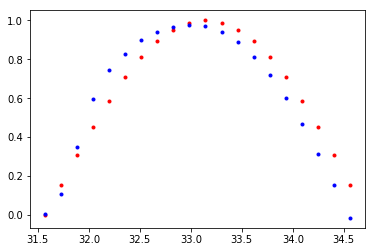

loss:  0.003819730831310153


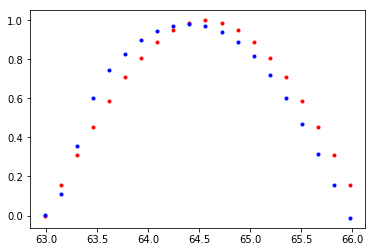

loss:  0.003875087946653366


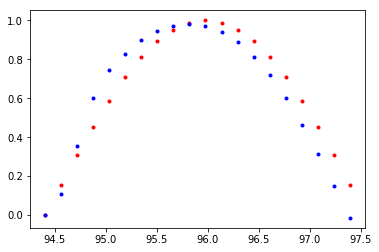

loss:  0.0038519904483109713


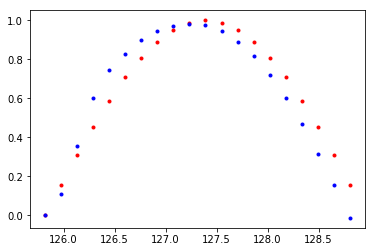

loss:  0.003842297475785017


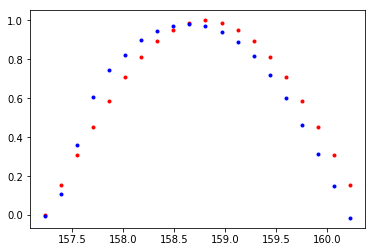

loss:  0.003776219440624118


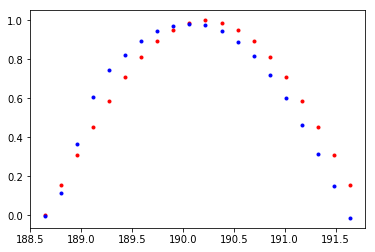

loss:  0.0037106855306774378


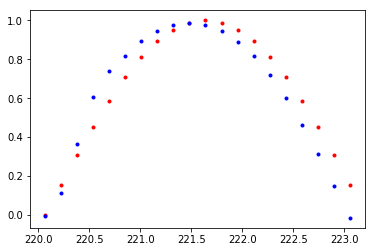

loss:  0.0036376642528921366


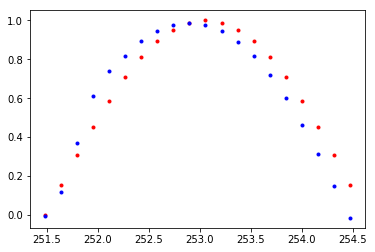

loss:  0.003569444641470909


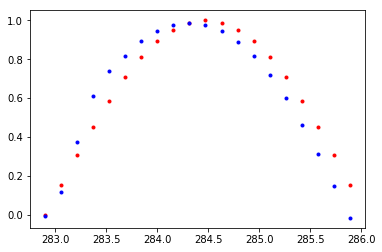

loss:  0.003507049987092614


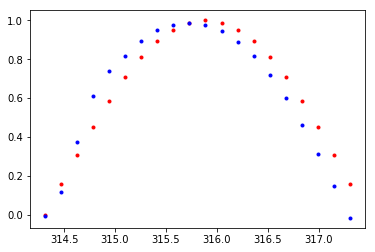

loss:  0.003447388531640172


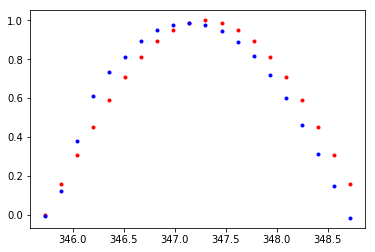

loss:  0.0033916051033884287


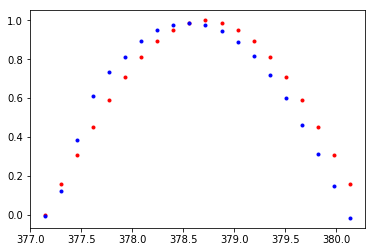

loss:  0.0033372004982084036


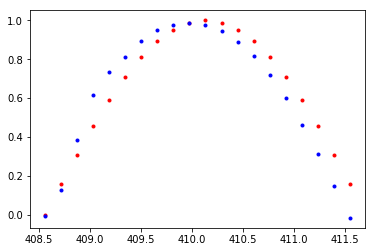

loss:  0.0032847116235643625


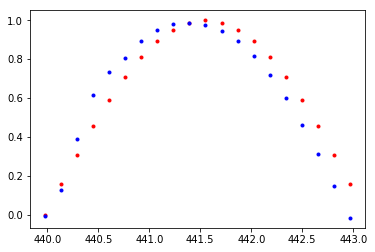

loss:  0.0032337787561118603


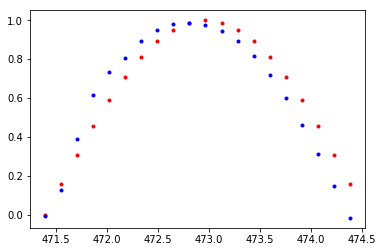

loss:  0.0031844372861087322


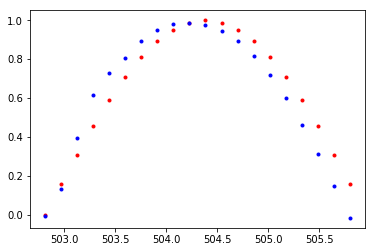

loss:  0.0031368215568363667


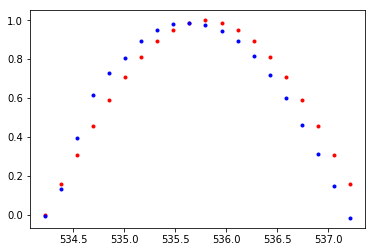

In [27]:

trained_rnn = train(rnn, n_steps, print_every)